In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pdb

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load model
model = mavenn.load_example_model('mpsa_ge_pairwise')

Model loaded from these files:
	/Users/jkinney/github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.pickle
	/Users/jkinney/github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.h5


In [3]:
# Get other parameters
L = model.L
C = model.C
cmap = "RdBu_r"
vmin = -.5
vmax = .5
kwargs = {'interpolation': 'nearest',
          'vmin': -.5,
          'vmax': .5,
          'cmap': "RdBu_r"}

In [4]:
def plot_theta(theta_dict):
    # Show additive parameters
    fig, axs = plt.subplots(1,2, figsize=[10,4])

    ax = axs[0]
    theta_add = theta_dict['theta_lc']
    im = ax.imshow(theta_add, **kwargs)
    plt.colorbar(im, ax=ax)
    ax.set_aspect('equal')

    ax = axs[1]
    theta_pair = theta_dict['theta_lclc'].reshape((L*C,L*C))
    ax.imshow(theta_pair, **kwargs)
    plt.colorbar(im, ax=ax)
    ax.set_aspect('equal')

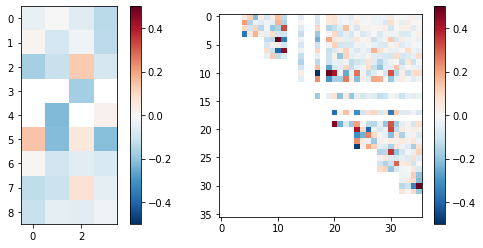

In [5]:
theta = model.get_theta(gauge='none')
plot_theta(theta)

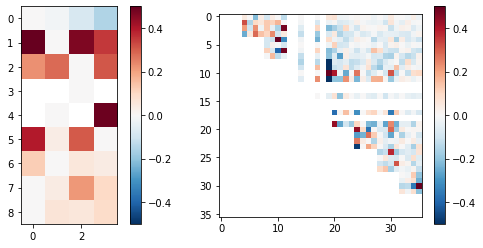

In [6]:
theta = model.get_theta(gauge='consensus')
plot_theta(theta)

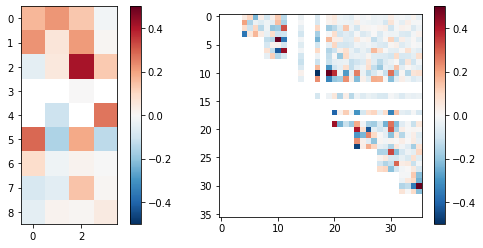

In [7]:
theta = model.get_theta(gauge='empirical')
plot_theta(theta)

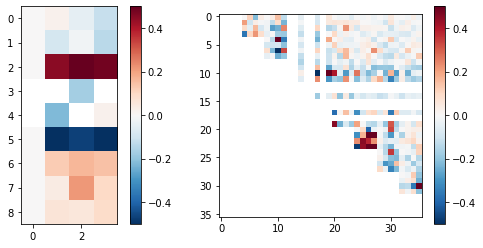

In [8]:
theta = model.get_theta(gauge='user', x_wt='A'*9)
plot_theta(theta)

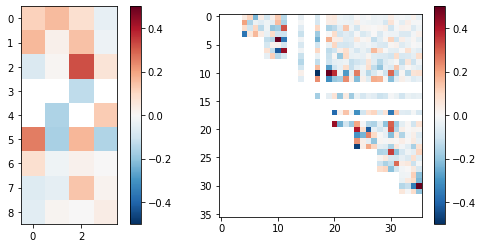

In [9]:
theta = model.get_theta(gauge='uniform')
plot_theta(theta)

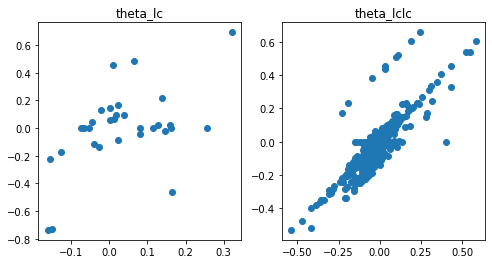

In [10]:
fig, axs = plt.subplots(1,2,figsize=[8,4])

# Get parameters in two different gauges
theta_x = model.get_theta(gauge='user', p_lc = (1/4)*np.ones((9,4)))
theta_y = model.get_theta(gauge='user', x_wt='A'*9)

# Plot parameter values
for ax, key in zip(axs, ['theta_lc', 'theta_lclc']):
    x = theta_x[key].ravel()
    y = theta_y[key].ravel()
    ax.set_title(key)
    ax.scatter(x, y)